In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
import sys

# print the original sys.path
print('Original sys.path:', sys.path)

# append a new directory to sys.path
sys.path.append('/media/DATA/martina_ma/dae')

# print the updated sys.path
print('Updated sys.path:', sys.path)


import utils.metadata as meta
import torch
from BIDS.core.vert_constants import v_name2idx, v_idx2name

Original sys.path: ['/media/DATA/martina_ma/dae/Experiments', '/home/martina/.conda/envs/dae_cond/lib/python310.zip', '/home/martina/.conda/envs/dae_cond/lib/python3.10', '/home/martina/.conda/envs/dae_cond/lib/python3.10/lib-dynload', '', '/home/martina/.conda/envs/dae_cond/lib/python3.10/site-packages', '/home/martina/.conda/envs/dae_cond/lib/python3.10/site-packages/numpy-1.26.1-py3.10-linux-x86_64.egg', '/home/martina/.conda/envs/dae_cond/lib/python3.10/site-packages/nibabel-5.1.0-py3.10.egg', '/home/martina/.conda/envs/dae_cond/lib/python3.10/site-packages/pytest-7.4.3-py3.10.egg', '/home/martina/.conda/envs/dae_cond/lib/python3.10/site-packages/pathlib-1.0.1-py3.10.egg', '/home/martina/.conda/envs/dae_cond/lib/python3.10/site-packages/tomli-2.0.1-py3.10.egg', '/home/martina/.conda/envs/dae_cond/lib/python3.10/site-packages/pluggy-1.3.0-py3.10.egg', '/home/martina/.conda/envs/dae_cond/lib/python3.10/site-packages/iniconfig-2.0.0-py3.10.egg', '/media/DATA/martina_ma/dae/bids']
Upda

####################################
/home/martina/.conda/envs/dae_cond/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  File "/home/martina/.conda/envs/dae_cond/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/martina/.conda/envs/dae_cond/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/martina/.conda/envs/dae_cond/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/martina/.conda/envs/dae_cond/lib/python3.10/site-packages/traitlets/config/application.py", line 1053, in launch_instance
    app.start()
  File "/home/martina/.conda/envs/dae_cond/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io

In [2]:
r = torch.load('reconst_find_timesteps_combinations.pt')
print(r)

[{'TimestepsEnc': 125, 'TimestepsDec': 20, 'ReconstDice': [tensor(0.9715), tensor(0.9866), tensor(0.9926), tensor(0.9872), tensor(0.9984), tensor(0.9833), tensor(0.9864), tensor(0.9743), tensor(0.9798), tensor(0.9987), tensor(0.9995), tensor(1.0000), tensor(0.9999), tensor(1.0000), tensor(0.9998), tensor(0.9998), tensor(0.9985), tensor(0.9997), tensor(0.9808), tensor(0.9874), tensor(0.9928), tensor(0.9893), tensor(0.9990), tensor(0.9850), tensor(0.9867), tensor(0.9826), tensor(0.9826), tensor(0.9980), tensor(0.9993), tensor(0.9999), tensor(0.9997), tensor(1.0000), tensor(0.9992), tensor(0.9992), tensor(0.9975), tensor(0.9988)]}, {'TimestepsEnc': 125, 'TimestepsDec': 50, 'ReconstDice': [tensor(0.9715), tensor(0.9866), tensor(0.9926), tensor(0.9872), tensor(0.9984), tensor(0.9833), tensor(0.9864), tensor(0.9743), tensor(0.9798), tensor(0.9987), tensor(0.9995), tensor(1.0000), tensor(0.9999), tensor(1.0000), tensor(0.9998), tensor(0.9998), tensor(0.9985), tensor(0.9997), tensor(0.9808), t

In [28]:


def clean_string(s):
    return s.strip("[]").replace("'", "")


df = torch.load("/media/DATA/martina_ma/emb_dict_3D_corpus_epoch15.pt") #/media/DATA/martina_ma/emb_dict_3D_cleaned_balanced.pt
df['label'] = df['label'].apply(clean_string)
df['label'] = (df['label'].apply(int))
df['subject'] = df['subject'].apply(clean_string)
print(df.info())

extended_df = meta.add_labels(df)
extended_df.info()
extended_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19038 entries, 0 to 19037
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   embeddings  19038 non-null  object
 1   label       19038 non-null  int64 
 2   subject     19038 non-null  object
 3   region      19038 non-null  object
 4   volume      19038 non-null  int64 
 5   fracture    19038 non-null  object
dtypes: int64(2), object(4)
memory usage: 892.5+ KB
None


/media/DATA/martina_ma/dae/utils/metadata.py:67: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '74.54794520547945' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/media/DATA/martina_ma/dae/utils/metadata.py:68: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2018-11-14 00:00:00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



fracture dict exists
fracture dict exists
no fractures
fracture dict exists
fracture dict exists
fracture dict exists
fracture dict exists
fracture dict exists
fracture dict exists
no fractures
fracture dict exists
no fractures
fracture dict exists
no fractures
fracture dict exists
no fractures
no fractures
fracture dict exists
fracture dict exists
no fractures
no fractures
no fractures
no fractures
Error parsing the input string: malformed node or string on line 1: <ast.Name object at 0x7facc0c9fbb0>
no fractures
fracture dict exists
no fractures
no fractures
Error parsing the input string: malformed node or string on line 1: <ast.Name object at 0x7facc0c9fb20>
no fractures
no fractures
fracture dict exists
fracture dict exists
fracture dict exists
fracture dict exists
no fractures
fracture dict exists
fracture dict exists
fracture dict exists
fracture dict exists
fracture dict exists
fracture dict exists
fracture dict exists
no fractures
no fractures
fracture dict exists
fracture dic

label         volume           age     cancerous    CT scanner  \
count  19038.000000   19038.000000  19038.000000  19038.000000  19038.000000   
mean      16.487551   29395.828816     16.571178     -0.669030     -0.536296   
std        4.421486   30130.944996     29.582273      0.716885      1.604454   
min        8.000000     554.000000     -1.000000     -1.000000     -1.000000   
25%       13.000000   14934.750000     -1.000000     -1.000000     -1.000000   
50%       17.000000   24631.000000     -1.000000     -1.000000     -1.000000   
75%       20.000000   36633.000000     40.000000     -1.000000     -1.000000   
max       25.000000  615180.000000    162.082192      1.000000     10.000000   

       fracture_grading  
count      19038.000000  
mean          -0.006408  
std            0.819960  
min           -1.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            4.000000

In [29]:


# Assuming `features_array` is your embeddings array with shape (num_samples, num_features)
features_ex = extended_df["embeddings"].tolist()
features_tensor_ex = torch.cat(features_ex, dim=0)
features_array_ex = features_tensor_ex.cpu().numpy()

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1500)
tsne_result = tsne.fit_transform(features_array_ex)#tsne.fit_transform(features_array)

# Add t-SNE results to the DataFrame
extended_df["tsne_1"] = tsne_result[:, 0]
extended_df["tsne_2"] = tsne_result[:, 1]

extended_df['dataset'] = None
for index, row in extended_df.iterrows():
    if "verse" in row['subject']:
        extended_df.at[index, 'dataset'] = "verse"
    elif "rsna" in row['subject']:
        extended_df.at[index, 'dataset'] = "rsna"
    elif "fxclass" in row['subject']:
        extended_df.at[index, 'dataset'] = "fxclass"
    elif "tri" in row['subject']:
        extended_df.at[index, 'dataset'] = "tri"
    elif "ctfu" in row['subject']:
        extended_df.at[index, 'dataset'] = "ctfu"

torch.save(extended_df,'/media/DATA/martina_ma/emb_dict_3D_corpus_tsne_epoch15.pt')#/media/DATA/martina_ma/emb_dict_3D_cleaned_balanced_epoch57.pt


In [30]:
#from plotly.offline import plot 


emb_df = torch.load('/media/DATA/martina_ma/emb_dict_3D_corpus_tsne_epoch15.pt') 
only_C = emb_df.copy()# fitered_vol_df

#
#print(len(fitered_vol_df[fitered_vol_df['seg_fail'] == 'S']))

l = True
if l:
    filtered_df = only_C.copy()
    # filtered_df = filtered_df[filtered_df['age'] != -1]
    # filtered_df = filtered_df[filtered_df['age'] < 110]
    #filtered_df = filtered_df[filtered_df['sex'] != 'U']
    #filtered_df = filtered_df[filtered_df['seg_fail'] != 'S']
    emb_df_x = filtered_df['tsne_1']
    emb_df_y = filtered_df['tsne_2']#emb_df["region"],
    emb_df_ct_scanner = filtered_df['CT scanner'].astype(str)
    emb_df_cancerous = filtered_df['cancerous'].astype(str)
    #filtered_df['fracture_flag'] = ['F' for f in filtered_df['fracture_flag'] if f == 'F' or f == 'FH']
    #filtered_df['fracture_flag'] = ['NF' if f == 'FH' else f for f in filtered_df['fracture_flag']]
    filtered_df['fracture_grading'] = filtered_df['fracture_grading'].astype(str)# , symbol=filtered_df['label']
    fig_reg = px.scatter(filtered_df, x=emb_df_x, y=emb_df_y, color=filtered_df['label'],hover_name=filtered_df['region'], hover_data=['sex','label','volume',"subject","region","Implant","fracture_flag","dataset","cancerous","CT scanner","sex","age"],title="t-SNE of Embeddings")
    #
    fig_reg.update_layout(autosize=False,
    width=1200,
    height=600,)#legend_orientation="h")
    fig_reg.update_traces(marker={'size': 5})
    fig_reg.show()
    #plot(fig_reg)
else: 
    emb_df_x = emb_df['tsne_1']
    emb_df_y = emb_df['tsne_2']#emb_df["region"],
    emb_df_ct_scanner = emb_df['CT scanner'].astype(str)
    emb_df_cancerous = emb_df['cancerous'].astype(str)
    emb_df_frac_grading = emb_df['fracture_grading'].astype(str)
    fig_reg = px.scatter(emb_df, x=emb_df_x, y=emb_df_y, color=emb_df['sex'], symbol=emb_df['label'],hover_name=emb_df['region'], hover_data=["subject","region","Implant","fracture_flag","dataset","cancerous","CT scanner","sex","age","volume",'label'], title="t-SNE of Embeddings")
    fig_reg.update_layout(legend_orientation="h")
    fig_reg.update_traces(marker={'size': 3})
    fig_reg.show()

In [8]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
fxclass_df = only_C.copy()
fxclass_df = fxclass_df[fxclass_df['fracture_grading'] != -1]
fxclass_df = fxclass_df[fxclass_df['fracture_grading'] != 4]
fxclass_df = fxclass_df[fxclass_df['fracture_grading'] != 1]
fxclass_df = fxclass_df[fxclass_df['fracture_flag'] != 'U']
#fxclass_df_only_F = fxclass_df[fxclass_df['fracture_flag'] == 'F']
#fxclass_df_only_F = fxclass_df_only_F[fxclass_df_only_F['Implant'] != 'U']
fxclass_df_only_F = fxclass_df.copy()

class_mapping = {0: 0, 2: 1, 3: 1}
fxclass_df_only_F['fracture_grading'] = fxclass_df_only_F['fracture_grading'].map(class_mapping)
y = fxclass_df_only_F['fracture_grading'].to_numpy()
#y = torch.from_numpy(y)
print(np.count_nonzero(y == 1))
print(np.count_nonzero(y == 0))

394
15035


In [11]:

#y = (fxclass_df['seg_fail'] == 'S')
features_ex = fxclass_df_only_F["embeddings"].tolist()
features_tensor_ex = torch.cat(features_ex, dim=0)
features_array = features_tensor_ex.cpu().numpy()
X= features_array
#y=
X_train = X
y_train = y
X_test = X
y_test = y
# Apply SMOTE for oversampling the minority class
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

param_dist = {"kernel": ['poly'], 
    "degree": range(1,30) 
    } 

# Create and train a logistic regression model
auc_scorer = make_scorer(roc_auc_score)
model = SVC(kernel='poly',degree = 23,class_weight='balanced')#kernel='poly',degree = 9, class_weight='balanced')# random_state=42)# LogisticRegression()
#model = RandomizedSearchCV(model, param_dist, n_iter=20, scoring=auc_scorer)
model.fit(X_train, y_train)
# Predict on the test set
#print(model.best_params_) #Random search with range 1 to 30 poly kernel{'kernel': 'poly', 'degree': 23}

y_pred = model.predict(X_test)


In [12]:

# Calculate accuracy
accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Balanced Accuracy: {accuracy:.6f}")
print(f"Roc_Auc: {roc_auc:.6f}")
print(f"Weighted Precision: {precision:.6f}")
print(f"Weighted Recall: {recall:.6f}")
print(f"F1 Score: {f1:.6f}")
print("Confusion Matrix:")
#print(conf_matrix)

CM = conf_matrix

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print(FN, FP)
print(TN, TP)

Balanced Accuracy: 0.807161
Roc_Auc: 0.807161
Weighted Precision: 0.125690
Weighted Recall: 0.751269
F1 Score: 0.215351
Confusion Matrix:
98 2059
12976 296


                                             embeddings  label      subject  \
2958  [[tensor(-0.0151, device='cuda:0'), tensor(-0....     19  fxclass0222   

     region  volume fracture fracture_flag sex        age fracture_heights  \
2958      T   20362      [F]             F   f  75.876712     [12, 19, 24]   

                exam_date  cancerous  CT scanner  fracture_grading Implant  \
2958  2018-04-10 00:00:00          1          -1                 4      NM   

          tsne_1    tsne_2  dataset  
2958  104.100914 -8.999694  fxclass  
                                              embeddings  label      subject  \
96     [[tensor(-0.0078, device='cuda:0'), tensor(-0....     12  fxclass0222   
1611   [[tensor(0.0777, device='cuda:0'), tensor(-0.1...     16  fxclass0222   
3171   [[tensor(-0.0058, device='cuda:0'), tensor(-0....     22  fxclass0222   
5497   [[tensor(0.0718, device='cuda:0'), tensor(-0.1...     13  fxclass0222   
6289   [[tensor(0.0783, device='cuda:0'), tensor(-0

/tmp/ipykernel_15942/3229302732.py:52: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/tmp/ipykernel_15942/3229302732.py:88: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/tmp/ipykernel_15942/3229302732.py:104: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Epoch 1/100, Train Loss: 0.686276, Val Loss: 0.744287
Epoch 2/100, Train Loss: 0.668627, Val Loss: 0.583095
Epoch 3/100, Train Loss: 0.593751, Val Loss: 0.559646
Epoch 4/100, Train Loss: 0.543389, Val Loss: 0.662951
Epoch 5/100, Train Loss: 0.507136, Val Loss: 0.729167
Epoch 6/100, Train Loss: 0.536256, Val Loss: 0.673068
Epoch 7/100, Train Loss: 0.478664, Val Loss: 0.516562
Epoch 8/100, Train Loss: 0.455730, Val Loss: 0.540665
Epoch 9/100, Train Loss: 0.466611, Val Loss: 0.583416
Epoch 10/100, Train Loss: 0.430336, Val Loss: 0.628425
Epoch 11/100, Train Loss: 0.437789, Val Loss: 0.305351
Epoch 12/100, Train Loss: 0.477287, Val Loss: 0.690165
Epoch 13/100, Train Loss: 0.439188, Val Loss: 0.836890
Epoch 14/100, Train Loss: 0.462582, Val Loss: 0.471154
Epoch 15/100, Train Loss: 0.433509, Val Loss: 0.393712
Epoch 16/100, Train Loss: 0.420554, Val Loss: 0.269935
Epoch 17/100, Train Loss: 0.361224, Val Loss: 0.593077
Epoch 18/100, Train Loss: 0.397573, Val Loss: 0.505468
Epoch 19/100, Train

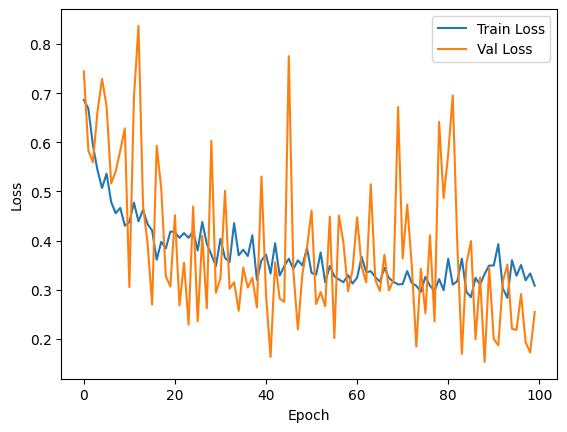

Test Accuracy: 0.912252, AUC: 0.900081


In [50]:
##### Fracture Classification #####
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.svm import SVC

fxclass_df = emb_df.copy()
fxclass_df = fxclass_df[fxclass_df['dataset'] == 'fxclass']
fxclass_df = fxclass_df[fxclass_df['fracture_flag'] != 'U']
fxclass_df = fxclass_df[fxclass_df['fracture_grading'] != -1]
rows = fxclass_df[fxclass_df['subject'] == "fxclass0222"]
rows = rows[rows['label'] == 19]
print(rows)
fxclass_df = fxclass_df[fxclass_df['fracture_grading'] != 4]

fxclass_df = fxclass_df[fxclass_df['fracture_grading'] != 1]
#1,fxclass0066,16,F,1
# rows = fxclass_df[fxclass_df['subject'] == "fxclass0066"]
# rows = rows[rows['label'] == 16]
# print(rows)

rows = fxclass_df[fxclass_df['subject'] == "fxclass0222"]
#rows = rows[rows['label'] == 19]
print(rows)


class_mapping = {0: 0, 2: 1, 3: 1}
fxclass_df['fracture_grading'] = fxclass_df['fracture_grading'].map(class_mapping)

print(len(fxclass_df[fxclass_df['fracture_grading'] == 1]))
print(len(fxclass_df[fxclass_df['fracture_grading'] == 0]))

import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torch.nn as nn
import torch.optim as optim

# Assuming fxclass_df is your DataFrame containing "embeddings" and "fracture_flag" columns

# Convert string representations of tensors to actual tensors

y = fxclass_df['fracture_grading'].to_numpy()
y = torch.from_numpy(y)

fxclass_df["embeddings"] = fxclass_df["embeddings"].apply(lambda x: x.cpu())
y = torch.tensor(y, dtype=torch.float32)#.reshape(-1, 1)  # 1 = F, 0 = Not F
print(type(y))
class1_count = len([l for l in y if l ==1])
class0_count = len([l for l in y if l ==0])
print(class1_count,class0_count)
print(y.shape)

import matplotlib.pyplot as plt
from torch.utils.data import WeightedRandomSampler
from sklearn.metrics import roc_auc_score, roc_curve, balanced_accuracy_score, precision_score

weight_for_class_0 = len(y) / (class0_count * 2) #= 0.5556
weight_for_class_1 = len(y) / (class1_count * 2)# = 5.0000
weight = torch.tensor([weight_for_class_0, weight_for_class_1]) #

# Convert embeddings to tensors and stack them into a single tensor
#X = fxclass_df["embeddings"].to_numpy()#torch.stack(fxclass_df["embeddings"].tolist())

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the dataset into training, validation, and testing sets
#X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42) #TODO increase val size, balance val set

#print(y_train.shape)
#y_train = y_train.reshape(-1,1)
#print(y_train.shape)
#X_test = torch.tensor(X_test)#.to(device)
#y_test = torch.tensor(y_test)#.to(device)

# Define custom dataset
class CustomDataset(Dataset):
    def __init__(self, df):
        self.X = df["embeddings"].to_numpy()#X#torch.tensor(X,dtype=torch.float32)
        y = df['fracture_grading'].to_numpy()
        y = torch.from_numpy(y)
        self.y = torch.tensor(y,dtype=torch.long)
        self.subject = df["subject"].to_numpy()
        self.label = df["label"].to_numpy()
        self.fracture = df["fracture_flag"].to_numpy()
        self.grade = df["fracture_grading"].to_numpy()

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        #label_name = str(v_idx2name.get(self.label[idx],-1))
        return {"emb": self.X[idx], "class": self.y[idx], "sub": self.subject[idx], "label": self.label[idx], "frac": self.fracture[idx], "grade":self.grade[idx] }
        #return self.X[idx], self.y[idx]

def create_sampler(y_sampler):
    # # Calculate class weights for imbalanced dataset
    class_counts = torch.bincount(torch.tensor(y_sampler))
    class_weights = 1.0 / class_counts.float()

    # # Create a sampler to use with the dataloader
    weights = class_weights[y_sampler]
    sampler = WeightedRandomSampler(weights, len(weights))
    return sampler

#sampler_val = create_sampler(y_val)
#sampler_test = create_sampler(y_test)
# Create custom dataset and dataloaders
# train_dataset = CustomDataset(X_train, y_train)
# val_dataset = CustomDataset(X_val, y_val)
#test_dataset = CustomDataset(X_test, y_test)
# train_dataset = CustomDataset(X_train, y_train)
# val_dataset = CustomDataset(X_val, y_val)

train_df, val_df = train_test_split(fxclass_df, test_size=0.4, random_state=42)
train_dataset = CustomDataset(train_df)
val_dataset = CustomDataset(val_df)
sampler_train = create_sampler(train_dataset.y)

train_loader = DataLoader(train_dataset, batch_size=32,sampler=sampler_train)#shuffle =True)# 
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False) #sampler=sampler_val)#
#test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)#sampler=sampler_test)#

# dataset = CustomDataset(X_train, y_train)
# test_dataset = CustomDataset(X_test, y_test)



# Define dataloader with weighted random sampler
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# train_loader = DataLoader(dataset, batch_size=32,shuffle = True)#sampler=sampler)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
weight = weight.to(device)
# Define a simple neural network model
class SimpleClassifier(nn.Module):
    def __init__(self,input_size=512, output_size=2):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(512, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc_out = nn.Linear(64, 2) 
        self.fc_one = nn.Linear(512,2)
        self.conv1 = nn.Conv1d(512, 64, 1, stride=1)
        self.conv2 = nn.Conv1d(64, 16, 1, stride=1)
        self.fc_16_2 = nn.Linear(16, 2)
        self.sig = nn.Sigmoid() # Output size is 2 for binary classification (F or not F)
        # Define convolutional layers with decreasing output channels
        self.conv1x1_1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=1)
        self.conv1x1_2 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=1)
        self.conv1x1_3 = nn.Conv1d(in_channels=32, out_channels=16, kernel_size=1)
        self.conv1x1_4 = nn.Conv1d(in_channels=16, out_channels=output_size, kernel_size=1)
        

    def forward(self, x):
        #x = x.view(x.size(0), -1)  # Flatten the input
        x = x.permute(0, 2, 1)
        x = self.conv1x1_1(x)
        x = self.relu(x)
        x = self.conv1x1_2(x)
        x = self.relu(x)
        x = self.conv1x1_3(x)
        x = self.relu(x)
        #x = self.conv1x1_4(x)
        #Given groups=1, weight of size [64, 512, 1], expected input[1, 32, 512] to have 512 channels, but got 32 channels instead
        # x = self.conv1(x)
        # #x = self.fc_one(x)
        # # x = self.fc1(x)
        # x = self.relu(x)
        # x = self.conv2(x)
        # x = self.relu(x)
        # x = self.fc_16_2(x)
        # x = self.fc2(x)
        # x = self.relu(x)
        # x = self.fc3(x)
        # x = self.relu(x)
        # x = self.fc_out(x)
       # x = self.sig(x)
        #x = x.view(x.size(0), -1) 
        # Squeeze the tensor to remove the singleton dimension
        x = x.squeeze(2)
        
        # Apply the final linear layer
        x = self.fc_16_2(x)
        return x

# Initialize the model and send to appropriate device
model = SimpleClassifier().to(device)
print(weight.shape)
# Define loss and optimizer
#criterion = nn.BCEWithLogitsLoss(weight=weight)
criterion = nn.CrossEntropyLoss()#weight=weight)#torch.tensor([class_weights[0], class_weights[1]])).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
train_losses = []
val_losses = []
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for x in train_loader:
       # lables =  labels.type(torch.LongTensor)
        inputs = x['emb'].to(device)
        labels = x['class'].to(device)
        #inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        #print(labels.shape)
        #print(outputs.shape)
        l_reshaped = labels#.reshape(-1,1)
        #print(l_reshaped.shape)

        loss = criterion(outputs, l_reshaped)#.reshape(-1,1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation loop
    model.eval()
    val_loss = 0.0
    
    with torch.no_grad():
        for x in val_loader:
       # lables =  labels.type(torch.LongTensor)
            inputs = x['emb'].to(device)
            labels = x['class'].to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}")


#plotting the loss
# losses = [l.cpu().detach().numpy() for l in losses]
# plt.plot(losses)#.detach().numpy() )
# plt.title('Loss vs Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('loss')
# Plotting the losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Evaluation on the test set
model.eval()
correct = 0
total = 0
val_preds = []
val_targets = []
all_probs = []
with torch.no_grad():
    for x in val_loader:
        emb = x['emb'].to(device)
        label = x['class'].to(device)
        #emb, label = emb.to(device), label.to(device)
        outputs = model(emb)
        _, predicted = torch.max(outputs, 1)
        val_preds.extend(predicted.cpu().numpy())
        val_targets.extend(label.cpu().numpy())

        total += label.size(0)
        correct += (predicted == label).sum().item()
        probs = torch.softmax(outputs, dim=1)
        all_probs.extend(probs[:, 1].cpu().numpy())  # Probability of class 1 (F)


        #accuracy = accuracy_score(label.cpu().numpy(), predicted.cpu().numpy())
accuracy = correct / total
auc = roc_auc_score(val_targets, all_probs)
print(f"Test Accuracy: {accuracy:.6f}, AUC: {auc:.6f}")
val_preds_arr = np.array(val_preds)
val_targets_arr = np.array(val_targets)
# Convert validation predictions and targets to numpy arrays



1208
1208


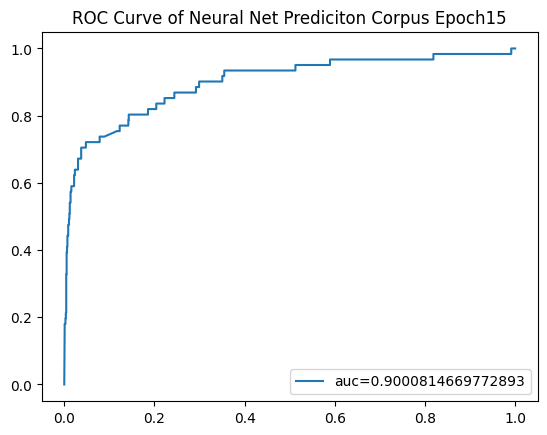

: 

In [53]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = val_targets_arr # ground truth labels
y_probas =  val_preds_arr# predicted probabilities generated by sklearn classifier
print(len(y_true))
print(len(y_probas))
fpr, tpr, _ = roc_curve(y_true,  all_probs)
#print(fpr)
#print(tpr)
auc = roc_auc_score(y_true, all_probs)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC Curve of Neural Net Prediciton Corpus Epoch15")
plt.show()

In [15]:
val_preds_arr = np.array(val_preds)
val_targets_arr = np.array(val_targets)
# Find indices where predictions are different# from targets
FP_indices = np.where((val_preds_arr == 1) & (val_targets_arr == 0))[0]  # False positives indices
FN_indices = np.where((val_preds_arr == 0) & (val_targets_arr == 1))[0]  # False negatives indices

# Print the indices
print("False Positive Indices:", FP_indices)
print("False Negative Indices:", FN_indices)

print(len(fxclass_df))
print(len(val_dataset))

FP_dataset = val_dataset[FP_indices]
FN_dataset = val_dataset[FN_indices]

df_FP = pd.DataFrame(FP_dataset)
df_FN = pd.DataFrame(FN_dataset)


False Positive Indices: [   4   12   18   19   28   45   62   90   95  102  106  120  140  147
  167  173  180  192  194  207  220  231  267  272  281  296  303  304
  316  320  322  329  334  368  369  375  387  389  405  431  432  458
  466  467  472  490  496  500  505  514  545  581  583  590  608  622
  643  662  676  688  689  691  692  697  714  721  725  746  770  825
  839  941  943  946  974  982  984  986 1005 1011 1013 1016 1089 1100
 1125 1132 1139 1148 1153 1155]
False Negative Indices: [  56  109  117  210  265  328  448  463  521  535  647  737  898  902
  920  942 1062]
3020
1208


In [26]:
for i in range(5):
    #print(val_loader[0]['sub'][0])
    print(val_dataset[0]['sub'])
    print(val_dataset[0]['label'])

for i in val_loader:
    print(i['sub'][0])
    break
#fxclass0222,19,
for i in val_dataset:
    if i['sub'] == 'fxclass0222' and i['label'] == 19:
        print(i['class'])
        print(i['frac'])
        break


fxclass0248
13
fxclass0248
13
fxclass0248
13
fxclass0248
13
fxclass0248
13
fxclass0248
tensor(0)
F


In [16]:

# Save false positives subset dataframe to CSV
df_FP.to_csv('fp_dict.csv', index=False)

# Save false negatives subset dataframe to CSV
df_FN.to_csv('fn_dict.csv', index=False)


In [51]:

from sklearn.metrics import *#roc_auc_score, roc_curve, balanced_accuracy_score
# Calculate performance measures
#accuracy = accuracy_score(val_targets, val_preds)
precision = precision_score(val_targets, val_preds)
recall = recall_score(val_targets, val_preds)
f1 = f1_score(val_targets, val_preds)
conf_matrix = confusion_matrix(val_targets, val_preds)
balanced_accuracy = balanced_accuracy_score(val_targets, val_preds)
print(f"Balanced Accuracy: {balanced_accuracy:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.6f}")
print("Confusion Matrix:")
print(conf_matrix)



Balanced Accuracy: 0.821859
Precision: 0.330827
Recall: 0.721311
F1 Score: 0.453608
Confusion Matrix:
[[1058   89]
 [  17   44]]


/tmp/ipykernel_15942/61573175.py:34: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



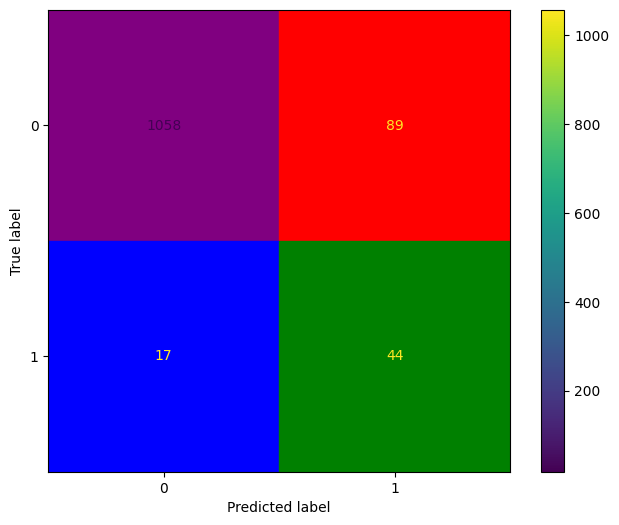

17 89
1058 44


In [52]:
from matplotlib.colors import ListedColormap, Normalize

# Assuming CM is your confusion matrix array

# Define your custom colormap with four distinct colors
custom_cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00'])

CM = conf_matrix

# Manually adjust the colormap to map specific values to specific colors
bounds = [0, 20, 40, 100]  # Set thresholds for the values in your confusion matrix
norm = plt.Normalize(bounds[0], bounds[-1])
colors = custom_cmap(norm(CM))

cmd = ConfusionMatrixDisplay(CM)#, display_labels=['business','health'])


# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
cmd.plot(ax=ax)

# Manually set the colors for cells below and above 200
# Manually set the colors for cells based on thresholds
for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
        if CM[i, j] < 20:
            color = 'blue'
        elif CM[i, j] < 50:
            color = 'green'
        elif CM[i, j] < 1000:
            color = 'red'
        else:
            color = 'purple'
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, color=color, fill=True, edgecolor='black'))

# Show the plot
plt.show()

# Show the plot

#cmd.plot(cmap=custom_cmap)


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print(FN, FP)
print(TN, TP)


In [24]:
df_dice_plot = pd.read_csv('/media/DATA/martina_ma/DAE3D_Corpus_Balanced/run-DAE_3D_corpus_version_20-tag-d_score.csv')
print(df_dice_plot.head())

df_train_plot = pd.read_csv('/media/DATA/martina_ma/DAE3D_Corpus_Balanced/run-DAE_3D_corpus_version_20-tag-loss_train_loss.csv')
print(df_train_plot.head())

df_val_plot = pd.read_csv('/media/DATA/martina_ma/DAE3D_Corpus_Balanced/run-DAE_3D_corpus_version_20-tag-loss_val_loss.csv')
print(df_train_plot.head())

df_perc_plot = pd.read_csv('/media/DATA/martina_ma/DAE3D_Corpus_Balanced/run-DAE_3D_corpus_version_20-tag-perceptual_loss.csv')
print(df_train_plot.head())

fig_reg = px.line(df_dice_plot, "Step", "Value", labels={
                     "Value": "Dice Score"
                 })
fig_reg.show()
fig_reg.write_image("/media/DATA/martina_ma/DAE3D_Corpus_Balanced/dice_score.svg")

fig_train = px.line(df_train_plot, "Step", "Value", labels={
                     "Value": "Train Loss"
                 })
fig_train.show()
fig_train.write_image("/media/DATA/martina_ma/DAE3D_Corpus_Balanced/train_loss.svg")

fig_val = px.line(df_val_plot, "Step", "Value", labels={
                     "Value": "Val Loss"
                 })
fig_val.show()
fig_val.write_image("/media/DATA/martina_ma/DAE3D_Corpus_Balanced/val_loss.svg")

fig_perc = px.line(df_perc_plot, "Step", "Value", labels={
                     "Value": "Percptual Loss"
                 })
fig_perc.show()
fig_perc.write_image("/media/DATA/martina_ma/DAE3D_Corpus_Balanced/perc_loss.svg")

      Wall time    Step     Value
0  1.709226e+09    7614  1.000000
1  1.709296e+09   45689  0.999994
2  1.709365e+09   83764  1.000000
3  1.709435e+09  121839  1.000000
4  1.709505e+09  159914  1.000000
      Wall time  Step     Value
0  1.709206e+09    85  0.668917
1  1.709206e+09   189  0.388502
2  1.709206e+09   335  0.110485
3  1.709206e+09   459  0.050249
4  1.709206e+09   469  0.073434
      Wall time  Step     Value
0  1.709206e+09    85  0.668917
1  1.709206e+09   189  0.388502
2  1.709206e+09   335  0.110485
3  1.709206e+09   459  0.050249
4  1.709206e+09   469  0.073434
      Wall time  Step     Value
0  1.709206e+09    85  0.668917
1  1.709206e+09   189  0.388502
2  1.709206e+09   335  0.110485
3  1.709206e+09   459  0.050249
4  1.709206e+09   469  0.073434


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
